# RESUME SCREENER

# Data Ingestion

In [124]:
import pandas as pd
import numpy as np

In [183]:
df=pd.read_csv("../Dataset/job_resume_matching_dataset.csv")

# EDA

In [190]:
df.iloc[1]["resume"]

'Experienced professional skilled in NLP, Statistics, R, with a strong record of delivering results.'

In [127]:
df.shape

(40000, 3)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_description  40000 non-null  object
 1   resume           40000 non-null  object
 2   match_score      40000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [129]:
df.describe()

,match_score
count,40000.000000
mean,1.989600
std,0.796309
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,5.000000


In [130]:
df.iloc[1000]

job_description    Information Scientist needed with experience i...
resume             Experienced professional skilled in Java, Pand...
match_score                                                        2
Name: 1000, dtype: object

In [131]:
df.iloc[1999]

job_description    Software Engineer needed with experience in Re...
resume             Experienced professional skilled in PowerBI, T...
match_score                                                        3
Name: 1999, dtype: object

In [132]:
df.iloc[1500]

job_description    Cloud Architect needed with experience in Reac...
resume             Experienced professional skilled in PowerBI, R...
match_score                                                        2
Name: 1500, dtype: object

In [133]:
df.isnull().sum()

job_description    0
resume             0
match_score        0
dtype: int64

In [134]:
df.duplicated().sum()

np.int64(0)

In [135]:
df.shape

(40000, 3)

In [136]:
df.columns

Index(['job_description', 'resume', 'match_score'], dtype='object')

## Data Visualization

In [137]:
# !pip install seaborn --q

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histogram

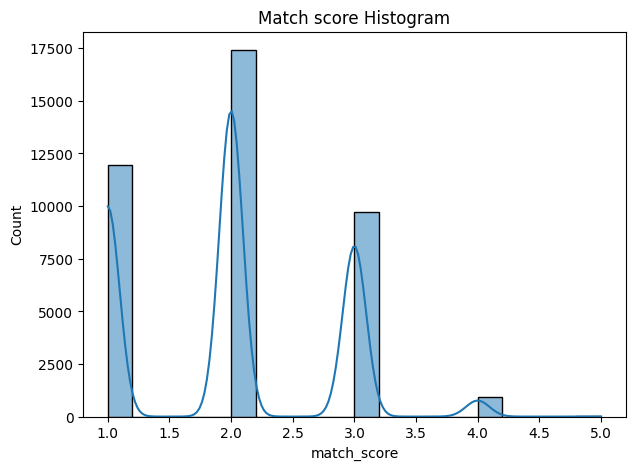

In [139]:
plt.figure(figsize=(7,5))
sns.histplot(df['match_score'],bins=20,kde=True)
plt.title("Match score Histogram")
plt.show()

There is too much 2's data, This might affect the model to get biased

<Axes: ylabel='match_score'>

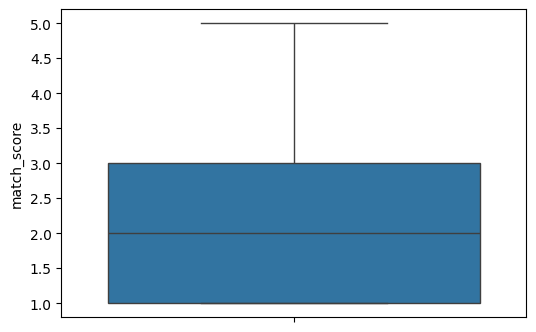

In [140]:
plt.figure(figsize=(6,4))
sns.boxplot(df['match_score'])

## Distributing Data Properly

In [141]:
counts=df["match_score"].value_counts().sort_index()

In [142]:
counts

match_score
1    11965
2    17408
3     9710
4      912
5        5
Name: count, dtype: int64

In [143]:
df["match_score"].value_counts(normalize=True).sort_index()*100

match_score
1    29.9125
2    43.5200
3    24.2750
4     2.2800
5     0.0125
Name: proportion, dtype: float64

In [144]:
df["match_score_cls"]=df["match_score"].replace({1:"low",2:"Medium",3:"Medium",4:"High",5:"High"})

In [145]:
df.drop(columns=['match_score'],inplace=True)

## Wordcloud representation

In [146]:
# !pip install wordcloud --q

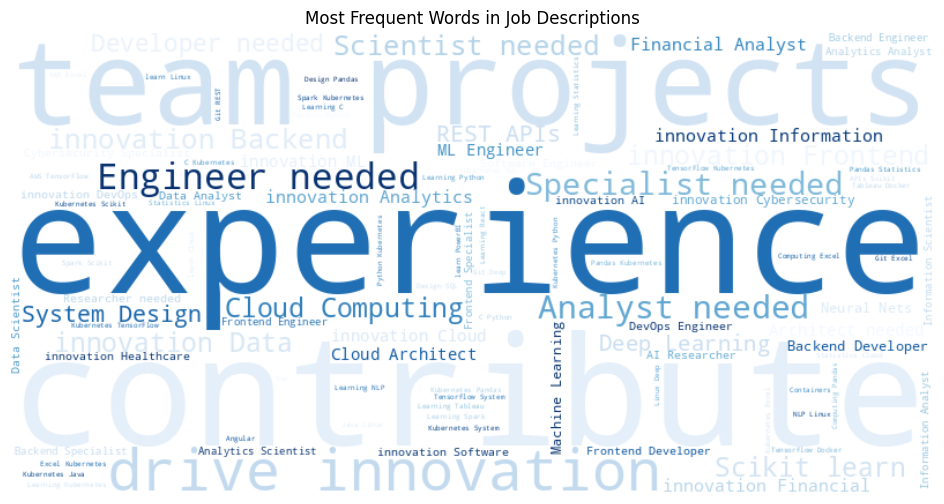

In [147]:
from wordcloud import WordCloud, STOPWORDS
job_text = " ".join(df['job_description'].astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", colormap="Blues",
                      max_words=100, width=800, height=400).generate(job_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Job Descriptions")
plt.show()

Features engineering

In [148]:
df.head()

,job_description,resume,match_score_cls
0,Analytics Scientist needed with experience in ...,"Experienced professional skilled in Pandas, AW...",Medium
1,Financial Analyst needed with experience in Gi...,"Experienced professional skilled in NLP, Stati...",low
2,Frontend Engineer needed with experience in Ne...,"Experienced professional skilled in C++, Linux...",Medium
3,Healthcare IT Specialist needed with experienc...,"Experienced professional skilled in Linux, NLP...",Medium
4,Information Analyst needed with experience in ...,Experienced professional skilled in Neural Net...,Medium


In [149]:
# !pip install scikit-learn --q

In [150]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[["low", "Medium", "High"]])

df["match_score_cls"] = oe.fit_transform(df[["match_score_cls"]]).astype(int)


In [181]:
df.iloc[0]["job_description"]

'analyt scientist need experi sql machin learn system design contribut team project drive innov'

### Word 2 vec

In [152]:
# !pip install nltk

In [153]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [154]:
def stemming(content):
    st_content = re.sub('[^a-zA-Z]', ' ', content)
    st_content = st_content.lower()
    st_content = st_content.split()
    st_content = [porter_stemmer.stem(word) for word in st_content if word not in stopwords.words('english')]
    return " ".join(st_content)

In [155]:
porter_stemmer=PorterStemmer()

In [156]:
df.columns

Index(['job_description', 'resume', 'match_score_cls'], dtype='object')

In [157]:
df["job_description"] = df["job_description"].apply(stemming)
df["resume"] = df["resume"].apply(stemming)


In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer



In [159]:
vectorizer=TfidfVectorizer()

In [160]:
vectorizer=vectorizer.fit(df["job_description"].to_list()+df["resume"].tolist())

In [161]:
job_tfidf = vectorizer.transform(df["job_description"])
resume_tfidf = vectorizer.transform(df["resume"])

In [162]:
from sklearn.metrics.pairwise import cosine_similarity

df["similarity"]=[
    cosine_similarity(job_tfidf[i],resume_tfidf[i])[0][0]
    for i in range(len(df))
    
]

In [163]:
df["similarity"].min()

np.float64(0.0)

In [164]:
df["similarity"].max()

np.float64(0.5837642008541579)

In [165]:
df[np.isclose(df["similarity"],0.4967295921087152)]

,job_description,resume,match_score_cls,similarity
25319,frontend specialist need experi gcp rest api s...,experienc profession skill spark rest api syst...,2,0.496725


We have inputs as : 
match_score_cls
job_tfidf 
resume_tfidf
similarity score
and output:

classes high ,mid ,low

In [166]:
import numpy as np

x=np.hstack((
job_tfidf.toarray(),
    resume_tfidf.toarray(),
    df["similarity"].values.reshape(-1,1)
))

y=df["match_score_cls"].values

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train,X_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42,stratify=y

    
)

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


In [171]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))


In [172]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, solver='lbfgs', class_weight='balanced')
,
    "Decision Tree": DecisionTreeClassifier(class_weight=class_weights),
    "Random Forest": RandomForestClassifier(class_weight=class_weights),
    "Gradient Boosting": GradientBoostingClassifier(),}

In [173]:
results=[]
for name ,model in models.items():
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    acc=accuracy_score(y_test,preds)*100
    print(f"for model :{name}, accuracy : {acc}")

    results.append([name,acc])

for model :Logistic Regression, accuracy : 55.037499999999994
for model :Decision Tree, accuracy : 66.175
for model :Random Forest, accuracy : 70.92500000000001
for model :Gradient Boosting, accuracy : 71.55


In [201]:
model = RandomForestClassifier(class_weight=class_weights)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [202]:
preds=model.predict(X_test)
acc=accuracy_score(y_test,preds)*100
print(f"for model :RandomForestClassifier , accuracy : {acc}")

for model :RandomForestClassifier , accuracy : 70.825


In [174]:
# finished with the notebook
import joblib
joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(model, "model.pkl")


['model.pkl']

In [203]:
# Testing the model

In [220]:
vectorizer = joblib.load("vectorizer.pkl")   
scaler = joblib.load("scaler.pkl")          
model = joblib.load("model.pkl")            

jd = "We are looking for a data scientist with Python and machine learning experience."
res   = "Skilled Python developer with ML background and experience in pandas, scikit-learn, and TensorFlow."

job_desc_clean = stemming(jd)
resume_clean = stemming(res)

job_tfidf = vectorizer.transform([job_desc_clean])
resume_tfidf = vectorizer.transform([resume_clean])
similarity = cosine_similarity(job_tfidf, resume_tfidf)[0][0]


X = np.hstack((job_tfidf.toarray(), resume_tfidf.toarray(), np.array([[similarity]])))
X_scaled = scaler.transform(X)



In [221]:

pred = model.predict(X_scaled)[0]

print("Predicted Match Score Class:", pred)
#low:0
#medium : 1
# high: 2


Predicted Match Score Class: 1
